# Exploratory Data Analysis for Emotion Dataset

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv('emotion.csv')

df

,sampleNumber,pitchMin,pitchMax,pitchAve,energy,duration,f0,f1,emotion
0,1,173.21300,445.0693,259.7484,0.035414,1.825438,1879.3180,4268.144,Happy
1,2,119.35350,238.9144,183.5432,0.043517,1.738500,900.2809,2731.502,Happy
2,3,170.80730,342.0865,295.4478,0.022256,1.477688,1525.3970,2802.673,Happy
3,4,211.86410,525.1389,286.6913,0.045537,1.651563,1294.0880,2912.171,Happy
4,5,93.47358,431.4441,228.8177,0.014125,1.629813,834.1687,2306.636,Happy
...,...,...,...,...,...,...,...,...,...
1745,1746,184.94850,260.2440,207.2135,0.001457,2.055750,2674.2230,4145.186,Neutral
1746,1747,178.75880,247.6475,205.3629,0.001426,1.522813,1126.6820,2886.465,Neutral
1747,1748,184.69890,579.7043,253.6695,0.001001,1.725875,900.8323,1939.114,Neutral
1748,1749,188.08380,230.5548,198.5660,0.001665,1.218250,1311.6010,3407.542,Neutral


## Describe the Dataset

- The dataset that is used in this analysis details the various combination of pitch, energy and fundamental frequency to determine what kind of emotion was used/presented during the data gathering.



In [3]:
# Identify the columns/features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1750 entries, 0 to 1749
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sampleNumber  1750 non-null   int64  
 1   pitchMin      1748 non-null   float64
 2   pitchMax      1748 non-null   float64
 3   pitchAve      1748 non-null   float64
 4   energy        1750 non-null   float64
 5   duration      1750 non-null   float64
 6   f0            1749 non-null   float64
 7   f1            1725 non-null   float64
 8   emotion       1750 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 123.2+ KB



## Identify Problems
1. What is the relation between pitch, energy, duration and frequency (f0 and f1) in determining the correct emotion?

## Data Cleaning

In [4]:
# missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False) * 100
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(9)


,Total,Percent
f1,25,1.428571
pitchMin,2,0.114286
pitchMax,2,0.114286
pitchAve,2,0.114286
f0,1,0.057143
sampleNumber,0,0.000000
energy,0,0.000000
duration,0,0.000000
emotion,0,0.000000


In [5]:
# dealing with missing data
df = df.fillna(0)
total = df.isnull().sum().sort_values(ascending=False)
total

sampleNumber    0
pitchMin        0
pitchMax        0
pitchAve        0
energy          0
duration        0
f0              0
f1              0
emotion         0
dtype: int64

In [6]:
# drop unnecessary column
df = df.drop('sampleNumber', axis=1)

df.head()

,pitchMin,pitchMax,pitchAve,energy,duration,f0,f1,emotion
0,173.21300,445.0693,259.7484,0.035414,1.825438,1879.3180,4268.144,Happy
1,119.35350,238.9144,183.5432,0.043517,1.738500,900.2809,2731.502,Happy
2,170.80730,342.0865,295.4478,0.022256,1.477688,1525.3970,2802.673,Happy
3,211.86410,525.1389,286.6913,0.045537,1.651563,1294.0880,2912.171,Happy
4,93.47358,431.4441,228.8177,0.014125,1.629813,834.1687,2306.636,Happy


## Bivariate Analysis

Finding out the relation between 2 variables

<AxesSubplot:xlabel='pitchAve', ylabel='energy'>

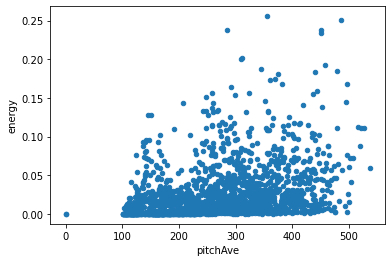

In [7]:
# scatter plot energy/pitchAve
data = pd.concat([df['pitchAve'], df['energy']],axis=1)
data.plot.scatter(x='pitchAve', y='energy')

<AxesSubplot:xlabel='f0', ylabel='duration'>

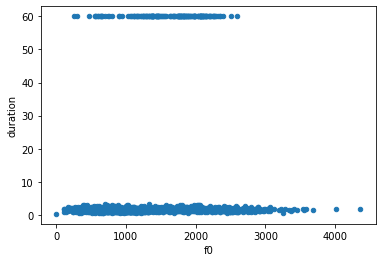

In [8]:
# scatter plot f0/duration
data = pd.concat([df['f0'], df['duration']],axis=1)
data.plot.scatter(x='f0', y='duration')

(-0.5, 6.5, -0.012707555, 0.268308455)

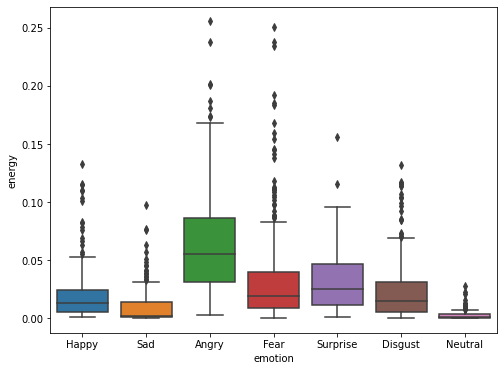

In [9]:
# box plot emotion/energy
data = pd.concat([df["energy"], df["emotion"]], axis=1)
f, ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x="emotion",y="energy", data=data)
fig.axis()

## Results

By doing Bivariate Analysis we can safely say that there is a relation between the pitchAve and energy in determining the emotion. However, this dataset is still small to conclude the said finding.